Model sensitivity to different values of horizontal and vertical prescribed diffusivity coefficients.

Sensitivity to Explicit Diffusivity Coefficients
============================

This ipython notebook investigates the model sensitivity to different values of horizontal and vertical prescribed diffusivity coeffiecients. Experiment 360x360x90_BodyForcing_6tr_LinProfiles has upwelling body forcing and a vertical gradient in the initial tracer concentration. Run01 explores values of horizontal diffusivity (1E-7 to 50) with fixed vertical diffusivity (1E-5). 

In [1]:
#KRM
import os

import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import nanmean

from math import *

%matplotlib inline

import numpy as np

import matplotlib.colors as mcolors

from netCDF4 import Dataset

import pylab as pl

from decimal import getcontext, Decimal, Inexact

import statsmodels.api as sm

import pandas as pd

In [2]:
#lib_path = os.path.abspath('../PythonModulesMITgcm') # Add absolute path to my python scripts
#sys.path.append(lib_path)

import NumDiffTools as dif

Important input parameters:
------------------------

In [3]:
nx = 360  # number of x points in domain
ny = 360  # number of y points in domain
nz = 90  # number of z levels in domain
nt = 21   # number of output files (n time) 
delt= 12*3600.0 # time interval between model output

Load output filenames:


In [4]:
### Load output filenames ###

filename = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_BodyForcing_6Tr_LinProfiles/run01notave/state.0000000000.glob.nc'
StateOut = Dataset(filename)
#for dimobj in StateOut.variables.values():
#    print dimobj

filename2 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_BodyForcing_1Tr/run01/mnc_0001/grid.t001.nc'
GridOut = Dataset(filename2)
#for dimobj in GridOut.variables.values():
  #  print dimobj

filename3 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_BodyForcing_6Tr_LinProfiles/run01notave/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3)
#for dimobj in PtracersOut.variables.values():
#    print dimobj


Horizontal diffusivity sensitivity
--------------------

Let's calculate the horizontal and vertical diffusivity for each of the 6 tracers in run01.

In [5]:
tracer1 = dif.getField(filename3,'Tr1')

tracer1msk = np.ma.masked_values(tracer1, 0)

MASK = np.ma.getmask(tracer1msk)
   
    
tracer2 = dif.getField(filename3,'Tr2')

tracer2msk = np.ma.masked_values(tracer2, 0)



tracer3 = dif.getField(filename3,'Tr3')

tracer3msk = np.ma.masked_values(tracer3, 0)


tracer4 = dif.getField(filename3,'Tr4')

tracer4msk = np.ma.masked_values(tracer4, 0)


tracer5 = dif.getField(filename3,'Tr5')

tracer1msk = np.ma.masked_values(tracer1, 0)


tracer6 = dif.getField(filename3,'Tr6')

tracer6msk = np.ma.masked_values(tracer6, 0)



Calculate the volume of the domain


In [6]:
#vol = dif.CalcDomVolume(filename2, nx, ny, nz)

#DomVolume = vol[0]
#hFacC = vol[1]
#drF = vol[2]
#rAC = vol[3]

#print(DomVolume)


  
DomVol = 0.0
    
hFacC = dif.getField(filename2,'HFacC')
drF   = dif.getField(filename2,'drF')
rAC   = dif.getField(filename2,'rA')
    
for jj in np.arange(ny):
    for kk in np.arange(nz):
      DomVol = DomVol + hFacC[kk,jj,:]*drF[kk]*rAC[jj,:]
    #print DomVol
  #print('\n The total volume is %e m^3 \n' %DomVolume)
   
DomVolume=sum(DomVol)
print DomVolume    

6.10285330795e+12


Tracer 1


In [7]:

q2mean1 = dif.CalcVariance(nt, nz, ny, nx, DomVolume, hFacC, drF, rAC, tracer1)
print('done')
dqdt1 = dif.CalcTimeDer(q2mean1, nt, delt)
print('done')
qmeanDh1 = dif.CalcAvgHorGrad(filename2, nt,nz,ny,nx,tracer1,DomVolume,hFacC, drF, rAC)
print('done')
qmeanDz1=dif.CalcAvgVerGrad(filename2, nt,nz,ny,nx,tracer1,DomVolume,hFacC, drF, rAC)
print('done')

esth1=dif.FitDiffusivity(-qmeanDh1[1:len(qmeanDh1)-1],dqdt1[0:len(dqdt1)], delt)
print(esth1.params)

estv1=dif.FitDiffusivity(-qmeanDz1[1:len(qmeanDz1)-1],dqdt1[0:len(dqdt1)], delt)
print(estv1.params)

print esth1.summary()
print estv1.summary()

done
done
done
done
[-0.16499406]
[ -3.37822892e-05]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     410.8
Date:                Fri, 09 Jan 2015   Prob (F-statistic):           7.65e-14
Time:                        10:44:20   Log-Likelihood:                 250.56
No. Observations:                  19   AIC:                            -499.1
Df Residuals:                      18   BIC:                            -498.2
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1650      0.008    -20.269      0.000        -0.182    -0.148

/home/kramosmu/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1276: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  int(n))



Tracer 2

In [8]:
q2mean2 = dif.CalcVariance(nt, nz, ny, nx, DomVolume, hFacC, drF, rAC, tracer2)
print('done')
dqdt2 = dif.CalcTimeDer(q2mean2, nt, delt)
print('done')
qmeanDh2 = dif.CalcAvgHorGrad(filename2, nt,nz,ny,nx,tracer2,DomVolume,hFacC, drF, rAC)
print('done')
qmeanDz2=dif.CalcAvgVerGrad(filename2, nt,nz,ny,nx,tracer2,DomVolume,hFacC, drF, rAC)
print('done')

esth2=dif.FitDiffusivity(-qmeanDh2[1:len(qmeanDh2)-1],dqdt2[0:len(dqdt2)], delt)
print(esth2.params)

estv2=dif.FitDiffusivity(-qmeanDz2[1:len(qmeanDz2)-1],dqdt2[0:len(dqdt2)], delt)
print(estv2.params)

print esth2.summary()
print estv2.summary()

done
done
done
done
[-0.16524882]
[ -3.47822369e-05]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Fri, 09 Jan 2015   Prob (F-statistic):           1.34e-13
Time:                        11:30:25   Log-Likelihood:                 250.17
No. Observations:                  19   AIC:                            -498.3
Df Residuals:                      18   BIC:                            -497.4
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1652      0.008    -19.617      0.000        -0.183    -0.148

Tracer 3

In [9]:
q2mean3 = dif.CalcVariance(nt, nz, ny, nx, DomVolume, hFacC, drF, rAC, tracer3)
print('done')
dqdt3 = dif.CalcTimeDer(q2mean3, nt, delt)
print('done')
qmeanDh3 = dif.CalcAvgHorGrad(filename2, nt,nz,ny,nx,tracer3,DomVolume,hFacC, drF, rAC)
print('done')
qmeanDz3=dif.CalcAvgVerGrad(filename2, nt,nz,ny,nx,tracer3,DomVolume,hFacC, drF, rAC)
print('done')

esth3=dif.FitDiffusivity(-qmeanDh3[1:len(qmeanDh3)-1],dqdt3[0:len(dqdt3)], delt)
print(esth3.params)

estv3=dif.FitDiffusivity(-qmeanDz3[1:len(qmeanDz3)-1],dqdt3[0:len(dqdt3)], delt)
print(estv3.params)

print esth3.summary()
print estv3.summary()

done
done
done
done
[-0.16499406]
[ -3.37822889e-05]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     410.8
Date:                Fri, 09 Jan 2015   Prob (F-statistic):           7.65e-14
Time:                        12:15:38   Log-Likelihood:                 250.56
No. Observations:                  19   AIC:                            -499.1
Df Residuals:                      18   BIC:                            -498.2
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1650      0.008    -20.269      0.000        -0.182    -0.148



Tracer 4

In [10]:
q2mean4 = dif.CalcVariance(nt, nz, ny, nx, DomVolume, hFacC, drF, rAC, tracer4)
print('done')
dqdt4 = dif.CalcTimeDer(q2mean4, nt, delt)
print('done')
qmeanDh4 = dif.CalcAvgHorGrad(filename2, nt,nz,ny,nx,tracer4,DomVolume,hFacC, drF, rAC)
print('done')
qmeanDz4=dif.CalcAvgVerGrad(filename2, nt,nz,ny,nx,tracer4,DomVolume,hFacC, drF, rAC)
print('done')

esth4=dif.FitDiffusivity(-qmeanDh4[1:len(qmeanDh4)-1],dqdt4[0:len(dqdt4)], delt)
print(esth4.params)

estv4=dif.FitDiffusivity(-qmeanDz4[1:len(qmeanDz4)-1],dqdt4[0:len(dqdt4)], delt)
print(estv4.params)

print esth4.summary()
print estv4.summary()

done
done
done
done
[-0.16502153]
[ -3.38562100e-05]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     408.1
Date:                Fri, 09 Jan 2015   Prob (F-statistic):           8.11e-14
Time:                        13:00:09   Log-Likelihood:                 250.53
No. Observations:                  19   AIC:                            -499.1
Df Residuals:                      18   BIC:                            -498.1
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1650      0.008    -20.200      0.000        -0.182    -0.148

Tracer 5

In [11]:
q2mean5 = dif.CalcVariance(nt, nz, ny, nx, DomVolume, hFacC, drF, rAC, tracer5)
print('done')
dqdt5 = dif.CalcTimeDer(q2mean5, nt, delt)
print('done')
qmeanDh5 = dif.CalcAvgHorGrad(filename2, nt,nz,ny,nx,tracer5,DomVolume,hFacC, drF, rAC)
print('done')
qmeanDz5=dif.CalcAvgVerGrad(filename2, nt,nz,ny,nx,tracer5,DomVolume,hFacC, drF, rAC)
print('done')

esth5=dif.FitDiffusivity(-qmeanDh5[1:len(qmeanDh5)-1],dqdt5[0:len(dqdt5)], delt)
print(esth5.params)

estv5=dif.FitDiffusivity(-qmeanDz5[1:len(qmeanDz5)-1],dqdt5[0:len(dqdt5)], delt)
print(estv5.params)

print esth5.summary()
print estv5.summary()

done
done
done
done
[-0.16522534]
[ -3.45147299e-05]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     393.8
Date:                Fri, 09 Jan 2015   Prob (F-statistic):           1.10e-13
Time:                        13:48:25   Log-Likelihood:                 250.32
No. Observations:                  19   AIC:                            -498.6
Df Residuals:                      18   BIC:                            -497.7
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1652      0.008    -19.845      0.000        -0.183    -0.148

Tracer 6

In [12]:
q2mean6 = dif.CalcVariance(nt, nz, ny, nx, DomVolume, hFacC, drF, rAC, tracer6)
print('done')
dqdt6 = dif.CalcTimeDer(q2mean6, nt, delt)
print('done')
qmeanDh6 = dif.CalcAvgHorGrad(filename2, nt,nz,ny,nx,tracer6,DomVolume,hFacC, drF, rAC)
print('done')
qmeanDz6=dif.CalcAvgVerGrad(filename2, nt,nz,ny,nx,tracer6,DomVolume,hFacC, drF, rAC)
print('done')

esth6=dif.FitDiffusivity(-qmeanDh6[1:len(qmeanDh6)-1],dqdt6[0:len(dqdt6)], delt)

print(esth6.params)

estv6=dif.FitDiffusivity(-qmeanDz6[1:len(qmeanDz6)-1],dqdt6[0:len(dqdt6)], delt)
print(estv6.params)

print esth6.summary()
print estv6.summary()

done
done
done
done
[-0.16499451]
[ -3.37818465e-05]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     410.8
Date:                Fri, 09 Jan 2015   Prob (F-statistic):           7.66e-14
Time:                        14:34:21   Log-Likelihood:                 250.56
No. Observations:                  19   AIC:                            -499.1
Df Residuals:                      18   BIC:                            -498.2
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1650      0.008    -20.268      0.000        -0.182    -0.148

Tracer variance plots:
--------------------

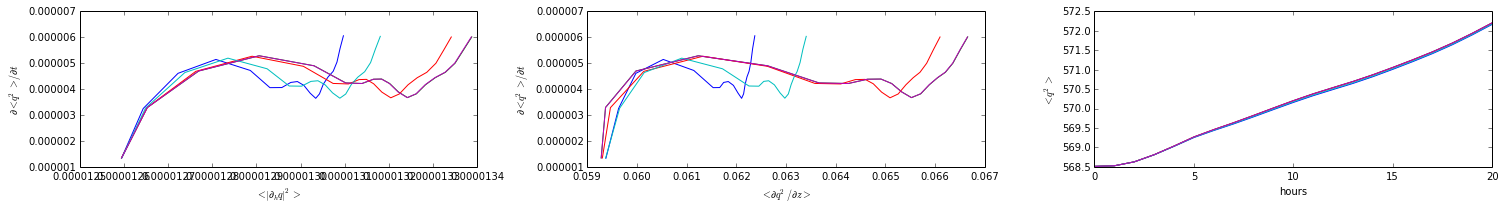

In [13]:

kh1=esth1.params
kv1=estv1.params

kh2=esth2.params
kv2=estv2.params

kh3=esth3.params
kv3=estv3.params

kh4=esth4.params
kv4=estv4.params

kh5=esth5.params
kv5=estv5.params

kh6=esth6.params
kv6=estv6.params


fig1=plt.figure(figsize=(21,3))

plt.subplot(1,3,1)
ax=plt.gca()


#plt.plot(qmeanDh1[1:len(qmeanDh1)-1],dqdt1)
plt.plot(qmeanDh2[1:len(qmeanDh2)-1],dqdt2)
plt.plot(qmeanDh3[1:len(qmeanDh3)-1],dqdt3)
plt.plot(qmeanDh4[1:len(qmeanDh4)-1],dqdt4)
plt.plot(qmeanDh5[1:len(qmeanDh5)-1],dqdt5)
plt.plot(qmeanDh6[1:len(qmeanDh6)-1],dqdt6)


plt.xlabel('$<|\partial_{h}q|^2>$')

plt.ylabel('$\partial{<q^2>}/\partial{t}$')
    

plt.subplot(1,3,2)
ax=plt.gca()

#plt.plot(qmeanDz1[1:len(qmeanDz1)-1],dqdt1)
plt.plot(qmeanDz2[1:len(qmeanDz2)-1],dqdt2)
plt.plot(qmeanDz3[1:len(qmeanDz3)-1],dqdt3)
plt.plot(qmeanDz4[1:len(qmeanDz4)-1],dqdt4)
plt.plot(qmeanDz5[1:len(qmeanDz5)-1],dqdt5)
plt.plot(qmeanDz6[1:len(qmeanDz6)-1],dqdt6)


plt.xlabel('$<\partial{q^2}/\partial{z}>$')

plt.ylabel('$\partial{<q^2>}/\partial{t}$')

plt.subplot(1,3,3)
ax=plt.gca()


#plt.plot(np.arange(0,nt,1),q2mean1)
plt.plot(np.arange(0,nt,1),q2mean2)
plt.plot(np.arange(0,nt,1),q2mean3)
plt.plot(np.arange(0,nt,1),q2mean4)
plt.plot(np.arange(0,nt,1),q2mean5)
plt.plot(np.arange(0,nt,1),q2mean6)

plt.xlabel('hours')

plt.ylabel('$<q^2>$')

plt.tight_layout()

Numerical diffusivities as a function of prescribed vertical diffusivity

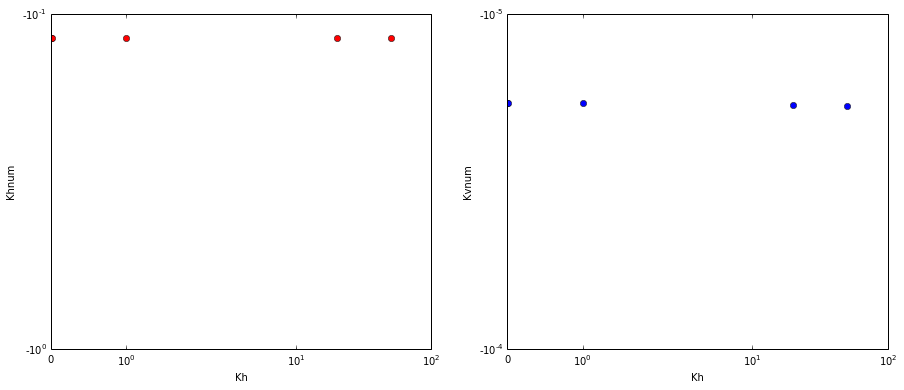

In [14]:
fig1=plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ax1=plt.gca()

ax1.plot()
ax1.plot()
#ax.plot((10E-7,10E-3,10E-2,10E-1,1.0,10.0),(esth1.params,esth2.params,esth3.params,esth4.params,esth5.params,esth6.params))
ax1.plot((10**(-7),50,10**(-5),1,20,10**(-2)),(kh1,kh2,kh3,kh4,kh5,kh6),'ro')
ax1.set_yscale('symlog')
ax1.set_xscale('symlog')
plt.xlabel('Kh')

plt.ylabel('Khnum')
    
plt.subplot(1,2,2)
ax2=plt.gca()

ax2.plot()
ax2.plot()
#ax.plot((10E-7,10E-3,10E-2,10E-1,1.0,10.0),(estv1.params,estv2.params,estv3.params,estv4.params,estv5.params,estv6.params))
ax2.plot((10**-7,50,10**-5,1,20,10**-2),(kv1,kv2,kv3,kv4,kv5,kv6),'bo')

ax2.set_yscale('symlog')

ax2.set_xscale('symlog')

plt.xlabel('Kh')

plt.ylabel('Kvnum')
   


(21, 90, 360, 360)